# SLU 05 - Covariance and Correlation: Exercise notebook

In [1]:
import pandas as pd 
import numpy as np 
import math 
import utils 

from IPython.display import Image
from matplotlib import pyplot as plt
from utils import get_house_prices_and_rooms, plot_house_prices_and_rooms
from utils import get_car_prices_year, get_car_prices_mileage, plot_car_prices_and_mileage,\
                check_currency_change, plot_some_correlations, plot_correlation_bargraph

# this is for grading without showing the answers 
import hashlib
def hash_answer(answer): 
    answer=str(answer)
    return hashlib.sha256((answer).encode()).hexdigest()

In this notebook, you will practice the following: 

    - Covariance 
    - Pearson correlation
    - Spearman correlation
    - Correlation matrix
    - Spurious correlations

----

# Exercise 1:  covariance and correlation with Pandas
Here you will apply what you learned in the Learning Notebook, calculating covariance and correlation on a sample dataset.

We're going to use a dataset of used car values in the USA for this exercise. Let's begin by taking a quick look at the dataset:

In [2]:
data = pd.read_csv('data/USA_cars_datasets.csv', index_col="index")
data.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
index,,,,,,,,,,,,
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


We'll begin by checking if the car's year of make is related to its price listing.

Edit the function below so that when given the two features, it returns their ***covariance***, ***Pearson correlation*** and ***Spearman correlation*** (in this order).

In [3]:
def check_if_related(prices, year):
    covariance = year.cov(prices)
    pearson_corr = year.corr(prices)
    spearman_corr = year.corr(prices, method="spearman")

    
    return covariance, pearson_corr, spearman_corr

check_if_related(data.price, data.year)

(17446.838442182325, 0.41827356849179426, 0.4768739902365554)

In [4]:
prices, year = get_car_prices_year()
assert math.isclose(check_if_related(prices, year)[0], 17446.83, abs_tol=0.01), "The covariance seems to be wrong."
assert math.isclose(check_if_related(prices, year)[1], 0.4182, abs_tol=0.0001), "The Pearson correlation seems to be wrong."
assert math.isclose(check_if_related(prices, year)[2], 0.4768, abs_tol=0.0001), "The Spearman correlation seems to be wrong."
print("Well done! Everything seems in order! The correlation between price and year does not seem very significant.")

Well done! Everything seems in order! The correlation between price and year does not seem very significant.


# Exercise 2: Using other units of measurement
Now for a thought exercise. These car prices are in USD. Let's assume we want to know the prices in EUR.

The exchange rate at the time of writing is 1.00 USD = 0.85 EUR, meaning that the EUR is a **larger** unit than the one in this dataset.

If we extract the covariance and Pearson/Spearman correlations again, but this time in EUR, which of these statements is true?
>**A.** The covariance, Pearson correlation and Spearman correlation will decrease.
>
>**B.** The covariance will decrease, but the Pearson correlation and Spearman correlation will increase.
>
>**C.** The covariance will remain the same, but Pearson correlation and Spearman correlation all decrease.
>
>**D.** The covariance will decrease, but Pearson correlation and Spearman correlation will remain the same.

Write the letter corresponding to your chosen answer as a text string into the variable ***ex2_answer*** below.

In [5]:
ex2_answer = "D"


In [6]:
assert hash_answer(ex2_answer.lower()) == "18ac3e7343f016890c510e93f935261169d9e3f565436429830faf0934f4f8e4", "Wrong choice. Remember that correlation does not depend on units."
print("Good job!")
check_currency_change(prices, year)

Good job!
The correlation is the same regardless of the units used, as it is normalized with variance.         
The covariance, however, is affected by units used. In USD the covariance was:
17446.838442182325
But in EUR the covariance is:
14829.81267585497


# Exercise 3: Predict correlation "by eye"

Let's take a look at a plot representing a correlation between three pairs of features. Assume we don't know anything else about the dataset besides this correlation graph.

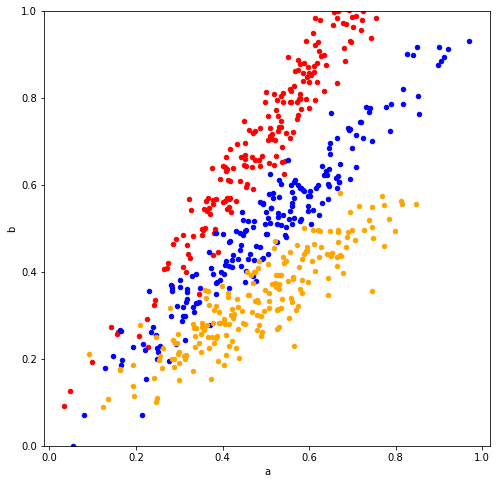

In [7]:
plot_some_correlations()

What can we infer from this graph?

>**A.** The orange series has the highest correlation.
>
>**B.** The blue series has the lowest correlation.
>
>**C.** All three series' correlations are positive.
>
>**D.** Nothing can be inferred from just the graph.

Write the letter corresponding to your chosen answer as a text string into the variable ***ex3_answer*** below.

In [8]:
ex3_answer = "C"


Nice!
The plot alone does not allow us to determine the correlation values themselves.             
However, from the positive slopes, we know that all correlations are positive.


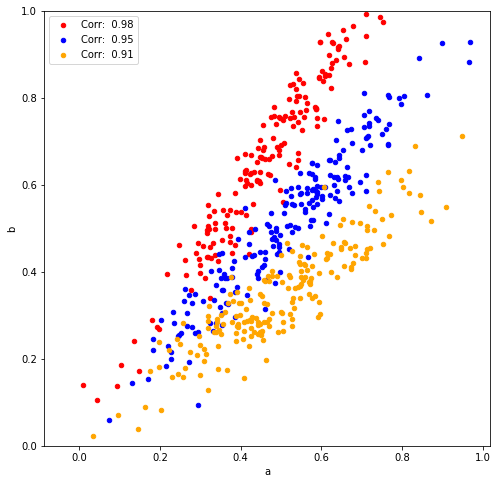

In [9]:
assert hash_answer(ex3_answer.lower()) == "2e7d2c03a9507ae265ecf5b5356885a53393a2029d241394997265a1a25aefc6", "Wrong choice. Remember that you can't infer the amount of correlation from the degree of the slope, it can only help with estimating possitive and negative correlations."
print("Nice!")
plot_some_correlations(legend=True)

----

# Exercise 4: Back to the cars - enter an outlier 
We are going back to analyze some car prices. 

In one case, there will be no outliers. In the other, there will be a single outlier (maybe someone famous drove one of them). 

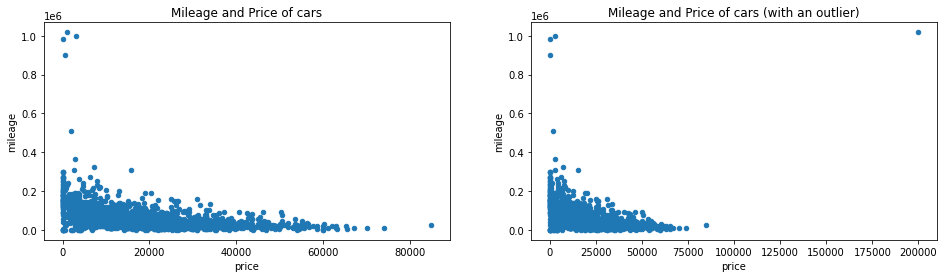

In [10]:
plot_car_prices_and_mileage()

# 4.1: Compare methods
Adjust the function below to calculate the correlations between the **mileage** of the car and the listed **price**. Have it return the Pearson correlation and the Spearman correlation, in that order.

In [11]:
def calculate_correlations_with_pandas(price, mileage):
    
    pearson_corr = price.corr(mileage)
    spearman_corr = price.corr(mileage, method="spearman")

    
    return pearson_corr, spearman_corr

Pearson without outlier : -0.40083818632936713
Pearson with outlier    : -0.28226340388400717
Spearman without outlier: -0.5273854709036083
Spearman with outlier   : -0.5250135912464327


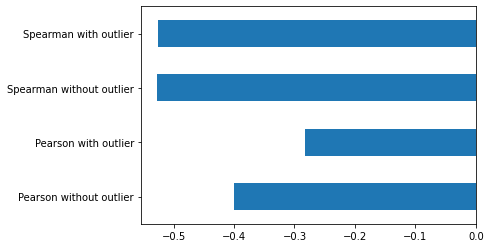

In [12]:
mileage, car_prices_normal, car_prices_with_outliers = get_car_prices_mileage()

pearson_corr_normal, spearman_corr_normal = calculate_correlations_with_pandas(car_prices_normal, 
                                                                               mileage)
pearson_corr_outlier, spearman_corr_outlier = calculate_correlations_with_pandas(car_prices_with_outliers, 
                                                                                 mileage)

# quick plot to see what happens
plot_correlation_bargraph(pearson_corr_normal, pearson_corr_outlier, 
                          spearman_corr_normal, spearman_corr_outlier )

In [13]:
assert math.isclose(abs(pearson_corr_normal - pearson_corr_outlier), 0.118, abs_tol=.01), "The Pearson correlation seems to be off. You should see some change between the two datasets."
assert math.isclose(abs(spearman_corr_normal - spearman_corr_outlier), 0, abs_tol=.01), "The Spearman correlation seems to be off. You should see almost no change between the two datasets."
print("So far, so good!")

So far, so good!


# 4.2: Choose best method

So, unsurprisingly, the more miles a car has, the lower the cost: a negative correlation. But, as you can see, having outliers may hugely affect your analysis. Then, when dealing with a dataset **with outliers**, which correlation methodology should you use?

>**A.** Pearson.
>
>**B.** Spearman.

Write the letter corresponding to your chosen answer as a text string into the variable ***ex4_answer*** below.

In [14]:
ex4_answer = "B"

Nice! Now you can avoid the data disruption caused by famous people's cars!


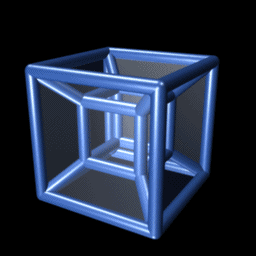

In [15]:
assert hash_answer(ex4_answer.lower()) == "3e23e8160039594a33894f6564e1b1348bbd7a0088d42c4acb73eeaed59c009d", "Wrong choice. Look at the changes in the correlations in the bar graphs."
print("Nice! Now you can avoid the data disruption caused by famous people's cars!")
Image(filename='./data/cjv.gif')

# Exercise 5: Stocks! 

Time to predict the stockmarket and get rich.

Explore the dataset provided below:

- Hint 1: you can use display (<name of df>) to force it to pretty print.
- Hint 2: use the heatmap of the correlation matrix that we used in the learning notebooks.
- Hint 3: you may want to import something to help with the visualization.
- Hint 4: you can either paste the answers or use a purely programmatic solution.
- Hint 5: when we say lowest and highest we mean the sign, not the "magnitude".

/tmp/ipykernel_21129/3861383738.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lower_triangle_mask = np.triu(np.ones(cor_mat.shape)).astype(np.bool)


ConocoPhillips        Marathon Oil Corp.    0.973070
Occidental Petroleum  Apache Corporation    0.922937
                      Marathon Oil Corp.    0.913058
Apache Corporation    Marathon Oil Corp.    0.911171
Exxon Mobil Corp.     Apache Corporation    0.907177
dtype: float64

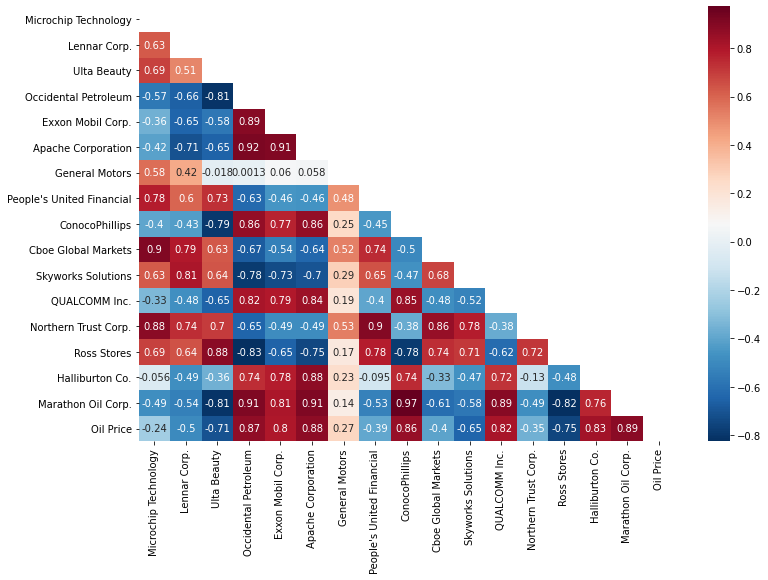

In [16]:
stocks = pd.read_csv('data/Stock_prices.csv')

cor_mat=stocks.corr()
import seaborn as sns

## visualization
lower_triangle_mask = np.triu(np.ones(cor_mat.shape)).astype(np.bool)
cor_mat_lower = cor_mat.mask(lower_triangle_mask)

plt.figure(figsize = (12,8))
sns.heatmap(cor_mat_lower, 
            annot=True,     # <-- write the numbers on the squares
            cmap='RdBu_r'); # <-- use a "red into blue, reversed" colormap 

#Question1
cor_mat_lower_unstack = cor_mat_lower.unstack().dropna()
lowest = cor_mat_lower.unstack().dropna().nsmallest(1)

#Question2
cor_mat=stocks.corr(method="spearman")
identity_matrix = np.identity(cor_mat.shape[0]).astype(bool)  # diagonal only 
corr_mat_without_diagonal = cor_mat.mask(identity_matrix)
Q2 = corr_mat_without_diagonal.loc["Ulta Beauty"].idxmin()

#Question3
cor_mat=stocks.corr(method="pearson")
Q3 = np.round(cor_mat.loc["QUALCOMM Inc."].loc["Marathon Oil Corp."],2)

#Question4
cor_mat_lower_unstack = cor_mat_lower.unstack().dropna()
cor_mat_lower.unstack().dropna().nlargest(5)


Now answer the following questions:
> __Q1__: What is the pair of stocks with the lowest pearson correlation? 
>
> __Q2__: What is the stock pair with the lowest rank Spearman correlation with Ulta Beauty? 
>
> __Q3__: What is the Pearson correlation between QUALCOMM Inc. and Marathon Oil Corp.? 
>
> __Q4__: Observe the top 4 Pearson correlation pairs, and then look at the general correlation matrix. 

In [17]:
# Complete the following questions 

# Q1: What is the pair of stocks with the lowest pearson correlation? 
# (pass the answer as a list, and remember, you can just type it in, no fancy Pandas needed) 
stock_pair_with_lowest_pearson_corr = ["Occidental Petroleum",  "Ross Stores"]

# # Q2: What is the stock pair with the lowest rank Spearman correlation with Ulta Beauty? 
# (the answer is a string)
lowest_rank_spearman_corr_with_ulta_beauty = Q2

# Q3: What is the Pearson correlation between QUALCOMM Inc. and Marathon Oil Corp.? 
# (answer is a float, use two decimal spaces)
pearson_corr_between_qualcomm_and_marathon_oil = Q3 


# Q4: Observe the top 4 Pearson correlation pairs, and then look at the general correlation matrix. 
# Is there a confounding variable that may explain why these companies are so correlated? 
possible_confounding_variable = "Oil Price"

In [18]:
assert hash_answer(sorted(stock_pair_with_lowest_pearson_corr)[0].lower()) == "6b075863de5a5c233441c451b63db6542c55ccabe6aca117f3262effbbbbcb68", "That is not the pair with the lowest pearson correlation."
assert hash_answer(sorted(stock_pair_with_lowest_pearson_corr)[1].lower()) == "252d948a7b16b67a910f2450a81e78760335c0128c05b53af2060de73bb4dc37", "That is not the pair with the lowest pearson correlation."

assert hash_answer(lowest_rank_spearman_corr_with_ulta_beauty.lower()) == "6b075863de5a5c233441c451b63db6542c55ccabe6aca117f3262effbbbbcb68", "Wrong lowest spearman correlation with Ulta Beauty."
assert math.isclose(pearson_corr_between_qualcomm_and_marathon_oil, 0.8918, abs_tol=0.01), "Wrong pearson correlation value between QUALCOMM Inc. and Marathon Oil Corp."
assert hash_answer(possible_confounding_variable.lower()) == "cb9b59e3f375975dd68cad5a89f1c080d42a070fee6f7b1ee191cdc63e54b366", "Look at what the product those 4 companies deal in."
print("Well done, you may not go bankrupt yet! No promises on getting rich though.")

Well done, you may not go bankrupt yet! No promises on getting rich though.


----

# Exercise 6: lots of stocks
You were hired by a hedge fund, because money. 

On the first day, your boss, Greedy McRiskyface asked you to select one stock pair. He wants the two stocks to be as uncorrelated as possible (use Pearson), so that he can short one and long the other. 

The answer should be (1) the two stocks, as a list and (2) their Pearson correlation, as a float. 

In [19]:
stock_data = utils.get_stocks_data_2()

In [20]:
corr_mat = stock_data.corr()
corr_mat
lower_triangle_mask = np.triu(np.ones(corr_mat.shape)).astype(np.bool)
corr_mat_lower = corr_mat.mask(lower_triangle_mask)
corr_mat_lower_unstacked = corr_mat_lower.unstack().dropna()
most_uncorr_idx = corr_mat_lower_unstacked.abs().idxmax()

most_uncorrelated_pair = list(most_uncorr_idx)
most_uncorrelated_pair_value = float(corr_mat_lower_unstacked.loc[most_uncorr_idx])

print(most_uncorrelated_pair, most_uncorrelated_pair_value)


['TLO', 'PPC'] -0.45633274789129474


/tmp/ipykernel_21129/1430638575.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lower_triangle_mask = np.triu(np.ones(corr_mat.shape)).astype(np.bool)
/tmp/ipykernel_21129/1430638575.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  most_uncorrelated_pair_value = float(corr_mat_lower_unstacked.loc[most_uncorr_idx])


In [21]:
assert isinstance(most_uncorrelated_pair, list)
assert len(most_uncorrelated_pair) == 2
assert isinstance(most_uncorrelated_pair_value, float)
utils.dirty_little_secret()


    Ok, we tricked you, and it was unfair of us.

    The reality is that this stock dataset was 100% RANDOM NUMBERS.

    The thing to remember is: if you use correlation without knowing the data, you are always going to find "something".
    A lot of bad data science comes from over trusting the tools without knowing the data.

    If you have enough data and dig into it using correlation you will ALWAYS find something
    ... even if there is nothing to be found.

    Correlation does not equal causality.
    And sometimes, it just means you found a signal where there was only noise.

    Now go on to the next SLU, and remember the day you modeled random numbers and found good stock picks :)
    
